# Q.11-20


In [2]:
%matplotlib inline
import cv2
import numpy as np
import matplotlib.pyplot as plt

## Q.11. 平滑化フィルタ
アベレージプーリングよりこっちの方が話が先な気もするがOpenCVだと1行。わかりやすくするために15x15で作成。

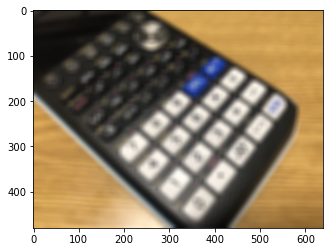

In [2]:
cimg = cv2.imread('Calc.jpg')
dst = cv2.blur(cimg,(15,15))
plt.imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB))

## Q.12. モーションフィルタ
対角方向に限らず任意の方向へのブレを再現する。と言った方が正しい。MATLABだとまんまmotionのブラーのカーネルを出力できるのだが，OpenCVにはないので，numpyで単位行列を生成して(これが45度のモーションのカーネルになる)，回転させたいのだが回転もアフィン行列を生成しないといけないので，PILのお手軽rotateを使う

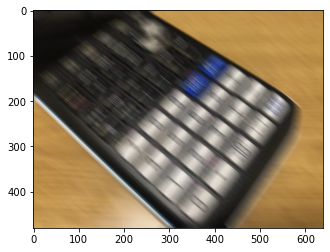

In [3]:
from PIL import Image
cimg = cv2.imread('Calc.jpg')
size = 25
kern = Image.fromarray(np.identity(size)/size) #この時点で45度
kern = kern.rotate(5,Image.BILINEAR) #PILは任意角度の回転が楽
kern = np.array(kern) #numpyのndarrayに戻す
dst = cv2.filter2D(cimg, -1, kern) 
plt.imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB))

別の回転方法としてScipyも似た感じでできる。こっちの方は変換が不要

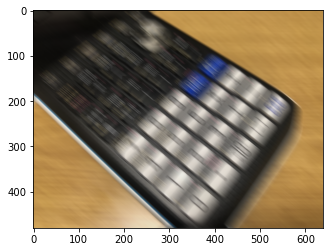

In [4]:
from scipy import ndimage
cimg = cv2.imread('Calc.jpg')
size = 25
kern = np.identity(size)/size #この時点で45度
kern = ndimage.rotate(kern, 5, reshape=False) 
dst = cv2.filter2D(cimg, -1, kern) 
plt.imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB))

## Q.13. MAX-MINフィルタ
最大値(最小値)フィルタは昔よく使ってた。
OpenCVではMorphology processingの膨張と収縮で対応する。


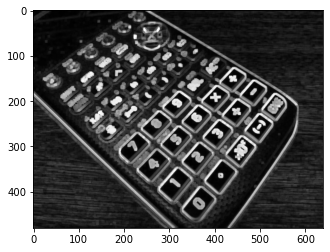

In [5]:
import numpy as np
gimg = cv2.imread('Calc.jpg', cv2.IMREAD_GRAYSCALE)
SE = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))
dstmax = cv2.dilate(gimg, SE)
dstmin = cv2.erode(gimg, SE)
plt.imshow(dstmax-dstmin, cmap='gray')

scipy.ndimageにはまんまのフィルタがあるのでそっちを使っても良い。注目画素と近傍内の最大値(最小値)を返すので非線形フィルタの練習として使える。

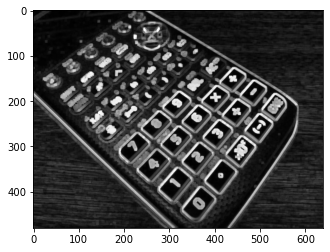

In [3]:
import numpy as np
from scipy.ndimage import maximum_filter , minimum_filter
gimg = cv2.imread('Calc.jpg', cv2.IMREAD_GRAYSCALE)
dstmax = maximum_filter(gimg, size=5)
dstmin = minimum_filter(gimg, size=5)
plt.imshow(dstmax-dstmin, cmap='gray')

PILでも同じ要領で出来る

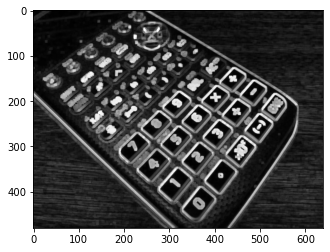

In [4]:
import numpy as np
from PIL import ImageFilter, Image, ImageChops
gimg = Image.fromarray(cv2.imread('Calc.jpg', cv2.IMREAD_GRAYSCALE))
dstmax = gimg.filter(ImageFilter.MaxFilter(5))
dstmin =  gimg.filter(ImageFilter.MinFilter(5))
dst = ImageChops.subtract(dstmax, dstmin)
dst = np.array(dst)
plt.imshow(dst, cmap='gray')


## Q.14. 微分フィルタ
縦横で-1, 1のオペレータで差分をとるだけなので，フィルタを手作りしてfilter2Dで良い

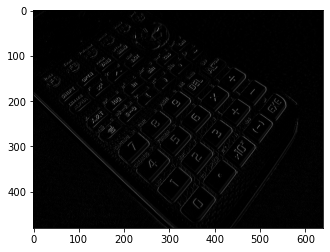

In [5]:
gimg = cv2.imread('Calc.jpg', cv2.IMREAD_GRAYSCALE)
kern = np.array([[0, 0, 0],[0, 1, -1], [0, 0, 0]])
dst = cv2.filter2D(gimg, -1, kern)
plt.imshow(dst, cmap='gray')

フィルタを転置して縦方向に

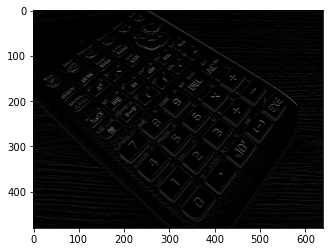

In [6]:
kern = kern.T
dst = cv2.filter2D(gimg, -1, kern)
plt.imshow(dst, cmap='gray')

## Q.15. Prewittフィルタ
OpenCVには実装されていないのでフィルタは手作りでfilter2D。縦横はさっきと同様転置するだけ。
微分の(-1, 0, 1)のフィルタに平滑化の(1, 1, 1)'なフィルタを掛けたもので，微分フィルタを3x3にしたものという訳ではない。平滑化が入っている点が唯の微分とは異なる。 ※順次フィルタ処理を掛けるのと，フィルタにフィルタ処理を施した結果でのフィルタ処理(ややこしい)は同じ結果になる特性を利用したもの

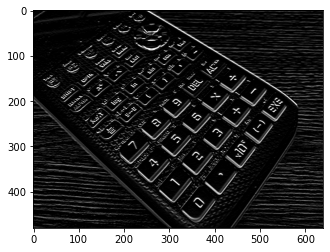

In [7]:
gimg = cv2.imread('Calc.jpg', cv2.IMREAD_GRAYSCALE)
kern = np.array([[1, 1, 1],[0, 0, 0], [-1, -1, -1]])
dst = cv2.filter2D(gimg, -1, kern)
plt.imshow(dst, cmap='gray')

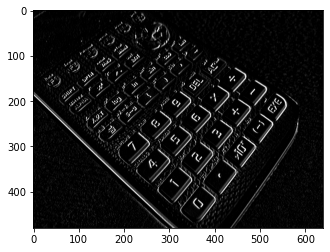

In [8]:
kern = kern.T
dst = cv2.filter2D(gimg, -1, kern)
plt.imshow(dst, cmap='gray')

## Q. 16. Sobelフィルタ
Prewittが平均化フィルタで平滑化したものに対し，こっちはガウシアンフィルタで微分フィルタを平滑化したもの。これはOpenCVに実装されている。

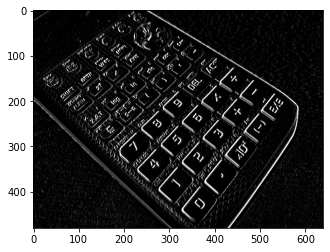

In [9]:
gimg = cv2.imread('Calc.jpg', cv2.IMREAD_GRAYSCALE)
dst = cv2.Sobel(gimg,cv2.CV_8U, 1, 0, ksize=3)
plt.imshow(dst, cmap='gray')

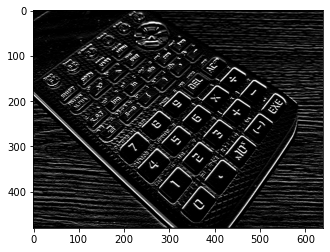

In [10]:
gimg = cv2.imread('Calc.jpg', cv2.IMREAD_GRAYSCALE)
dst = cv2.Sobel(gimg,cv2.CV_8U, 0, 1, ksize=3)
plt.imshow(dst, cmap='gray')

## Q.17. Laplacianフィルタ
x方向とy方向の二次微分の和。OpenCVに実装されている。ノイズに滅法弱い。

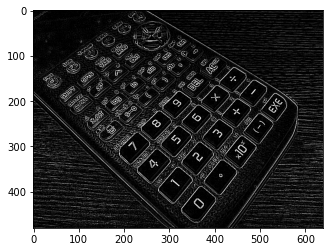

In [11]:
gimg = cv2.imread('Calc.jpg', cv2.IMREAD_GRAYSCALE)
dst = cv2.Laplacian(gimg, cv2.CV_8U, ksize=3)
plt.imshow(dst, cmap='gray')

## Q.18. Embossフィルタ
Emboss効果は原画像を反転して若干動かしたものを原画像に加算する処理で，そのままだと負値を持つのでuint8(cv2.CV_U8)な画像として扱う場合には128を加算してゼロレベルをグレーに持ち上げるケースが多い。
移動するフィルタと考えると(左上に1画素移動)
```
| 1   0   0|
| 0   0   0|
| 0   0   0|
```
となるので，これに-1を乗算すれば移動して反転。そして，原画像を表すフィルタ
```
| 0   0   0| 
| 0   1   0|
| 0   0   0|
```
を足したものがEmbossフィルタになる筈。


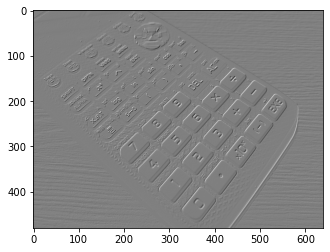

In [12]:
gimg = cv2.imread('Calc.jpg', cv2.IMREAD_GRAYSCALE)
kern = np.array([[-1, 0, 0],[0, 1, 0], [0, 0, 0]], dtype=np.double)
dst = cv2.filter2D(gimg, cv2.CV_32F, kern)
plt.imshow(dst, cmap='gray')

## Q.19. LoGフィルタ
Laplacian of Gaussianフィルタ。名前の通り，ガウシアンでボケさせた後にラプラシアンフィルタを掛けた効果で，ゼロクロス検知をするとエッジの中央が見付けられるが，LoGのゼロクロス検知はOpenCVには実装されていないのでひとまずフィルタ処理だけにしておく。


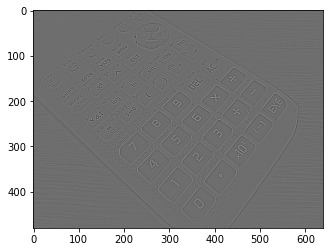

In [15]:
img = cv2.imread('Calc.jpg', cv2.IMREAD_GRAYSCALE)
dst = cv2.GaussianBlur(img, ksize=(3,3), sigmaX=2.0)
dst = cv2.Laplacian(img, cv2.CV_32F, ksize=3)
plt.imshow(dst, cmap='gray')

## Q.20. ヒストグラム表示
OpenCVのヒストグラムは非常に面倒なのでmatplotlibのhist関数を使うのが手っ取り早いが，画像を1次元化しておく必要があるので注意(ravelメソッド)

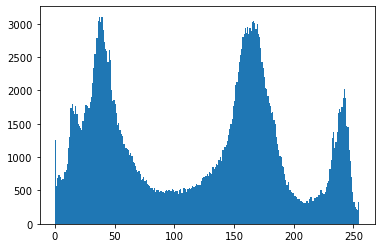

In [13]:
gimg = cv2.imread('Calc.jpg', cv2.IMREAD_GRAYSCALE)
x = plt.hist(gimg.ravel(), bins=255, range=(0, 255))

OpenCVの方。複数の画像とかチャネルを設定できるように実装したようなのだが，単一画像のヒストグラムを表示しようとしたときでもリストに突っ込む必要があり，複雑過ぎてあまり使われない。

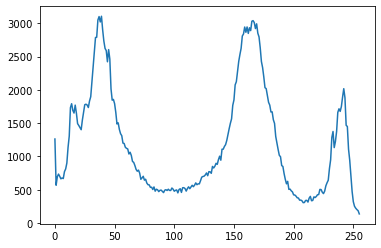

In [14]:
gimg = cv2.imread('Calc.jpg', cv2.IMREAD_GRAYSCALE)
h = cv2.calcHist(images=[gimg], channels=[0], mask=None, histSize=[256], ranges=(0, 256))
plt.plot(h)